<a href="https://colab.research.google.com/github/avrland/dataScienceFromScratch/blob/main/News_titles_stats_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prolog do analizy danych
W tym przykładzie przeanalizujemy 23 tysiące nagłówków newsów zebranych z Polskich portali informacyjnych na przestrzeni lipca-sierpnia 2020 roku. Użyte kanały rss zawierają się w tablicy **rss_chans.**

In [ ]:
rss_chans = [
    "http://fakty.interia.pl/feed",
    "http://rss.gazetaprawna.pl/GazetaPrawna",
    "http://fakty.interia.pl/polska/feed",
    "http://fakty.interia.pl/swiat/feed",
    "http://fakty.interia.pl/nauka/feed",
    "http://fakty.interia.pl/felietony/feed",
    "http://on.interia.pl/feed",
    "http://film.interia.pl/feed",
    "https://biznes.interia.pl/podatki/feed",
    "https://www.tvn24.pl/najnowsze.xml",
    "https://www.tvn24.pl/najwazniejsze.xml"
    "https://eurosport.tvn24.pl/sport,81,m.xml",
    "https://www.tvn24.pl/wiadomosci-z-kraju,3.xml",
    "https://www.tvn24.pl/wiadomosci-ze-swiata,2.xml",
    "https://www.tvn24.pl/biznes-gospodarka,6.xml",
    "https://www.tvn24.pl/pogoda,7.xml",
    "https://www.tvn24.pl/kultura-styl,8.xml",
    "https://www.polsatnews.pl/rss/wszystkie.xml",
    "https://www.polsatnews.pl/rss/polska.xml",
    "https://www.polsatnews.pl/rss/swiat.xml",
    "https://www.polsatnews.pl/rss/wideo.xml"
]

# Pobieranie danych do analizy
Dokonujemy pobrania z githuba przygotowanej bazy tytułów do analizy i wylistowujemy kilka pierwszych linijek dla sprawdzenia, czy plik został pobrany poprawnie.

In [ ]:
#Open file and read first 10 news
!pip install wget
import wget

url = 'https://raw.githubusercontent.com/avrland/dataScienceFromScratch/main/titlesNoDuplicate.txt'
wget.download(url, '/content/titles.txt')
filename = '/content/titles.txt'  

with open(filename) as fn:  
  ln = fn.readline()
  lncnt = 0
  while lncnt < 10:
       print("Line {}: {}".format(lncnt, ln.strip()))
       ln = fn.readline()
       lncnt += 1

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=5d7f98741dbbe86dd816f7efcecc58a51d4b44daa82b56f6f23dd9fbc62e5075
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
Line 0: 
Line 1: Polka straciła 36 tys. zł: napastnik wykiwał zarówno ją, jak i bank
Line 2: Chrome 86 na Androida pozwoli zaplanować pobieranie. Można już testować
Line 3: Poczta Polska i cyfrowa rewolucja. Identyfikacja RFID przyspieszy wysyłki
Line 4: GOG GALAXY 2.0 łączy siły z Epic Games Store. Jest wreszcie oficjalna integracja
Line 5: Android Auto ma problem – miesza okładki odtwarzanych albumów
Line 6: Sony stworzyło emulator PS1. Odnalazł go wnikliwy fan... w grze na PS4
Line 7: Windows 10 odzyska opcjonalne aktualizacje. "Stary" tryb wróci jeszcze w lipcu
Line 8: Disney odcina się od Facebooka. Największy reklamodawca nie chce zarabiać na hejcie
Line 9: Atak BadPower na szybkie ładowarki. Sprzęt może się p

# Przygotowanie danych do analizy
Wycinamy wyrazy krótsze niż 4 znaki - w większości są to przyimki które nie niosą ze sobą informacji o trendach.

In [ ]:
from collections import Counter
import numpy as np
import collections
p1 = Counter()
with open(filename) as f:
  p1 = Counter(f.read().split())
amount = len(list(p1.elements()))
print(amount)
print(list(p1.elements())[0])
print(len(list(p1.elements())[0]))
y = 0
for x in range(6000):
  y += 1
  print("Pętla nr: " + str(y))
  if len(list(p1.elements())[x]) <= 3:
    del p1[list(p1.elements())[x]]
print(p1)
p1 = p1.most_common(40)
labels, values = zip(*p1)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Pętla nr: 1002
Pętla nr: 1003
Pętla nr: 1004
Pętla nr: 1005
Pętla nr: 1006
Pętla nr: 1007
Pętla nr: 1008
Pętla nr: 1009
Pętla nr: 1010
Pętla nr: 1011
Pętla nr: 1012
Pętla nr: 1013
Pętla nr: 1014
Pętla nr: 1015
Pętla nr: 1016
Pętla nr: 1017
Pętla nr: 1018
Pętla nr: 1019
Pętla nr: 1020
Pętla nr: 1021
Pętla nr: 1022
Pętla nr: 1023
Pętla nr: 1024
Pętla nr: 1025
Pętla nr: 1026
Pętla nr: 1027
Pętla nr: 1028
Pętla nr: 1029
Pętla nr: 1030
Pętla nr: 1031
Pętla nr: 1032
Pętla nr: 1033
Pętla nr: 1034
Pętla nr: 1035
Pętla nr: 1036
Pętla nr: 1037
Pętla nr: 1038
Pętla nr: 1039
Pętla nr: 1040
Pętla nr: 1041
Pętla nr: 1042
Pętla nr: 1043
Pętla nr: 1044
Pętla nr: 1045
Pętla nr: 1046
Pętla nr: 1047
Pętla nr: 1048
Pętla nr: 1049
Pętla nr: 1050
Pętla nr: 1051
Pętla nr: 1052
Pętla nr: 1053
Pętla nr: 1054
Pętla nr: 1055
Pętla nr: 1056
Pętla nr: 1057
Pętla nr: 1058
Pętla nr: 1059
Pętla nr: 1060
Pętla nr: 1061
Pętla nr: 1062
Pętla nr: 1063
Pętla

In [ ]:
print(p1)
p1 = p1.most_common(40)
labels, values = zip(*p1)

Counter({'Koronawirus': 890, 'jest': 676, 'Polsce.': 424, 'przed': 399, 'będzie': 387, 'osób': 347, 'zakażeń': 347, 'nowych': 332, 'Polski': 314, 'Jest': 297, 'może': 291, 'przez': 257, 'koronawirusa': 254, 'świata': 244, 'PlayStation': 243, 'ponad': 231, 'które': 224, 'przypadków': 217, 'informacje': 214, 'koronawirusem': 214, 'szczycie': 211, 'Białorusi': 209, 'żyje': 205, 'Raport': 202, '"Nie': 201, 'Ponad': 195, 'Xbox': 194, 'tys.': 190, 'Microsoft': 188, 'Polska': 179, 'Najnowsze': 179, 'Sławomira': 178, 'Koronawirus.': 177, 'Nowy': 176, 'sierpnia': 174, 'Dnia.': 172, 'lipca': 167, 'nowe': 158, 'Ministerstwo': 158, '[WIDEO]': 155, 'Mapa': 153, 'sprawie': 150, 'wiemy': 149, 'Polsce': 147, 'koronawirusem.': 146, 'Nowe': 146, 'sobie': 145, 'tylko': 145, 'jego': 144, 'osobach,': 144, 'zmarły?': 144, 'roku': 143, 'osoby': 142, 'premiery': 141, 'kolejne': 139, '[RELACJA]': 138, 'Andrzej': 137, 'Ghost': 135, 'film': 133, 'nowym': 132, 'Premier': 131, 'gier': 130, 'jeszcze': 129, 'więcej'

# Wizualizacja - "drzewo trendu"
Podobne do narzędzi do analizy zajętości powierzchni dysków na komputerze, rozmiarem kwadratu reprezentujemy największą częstotliwość pojawienia się danego słowa.

(0.0, 100.0, 0.0, 100.0)

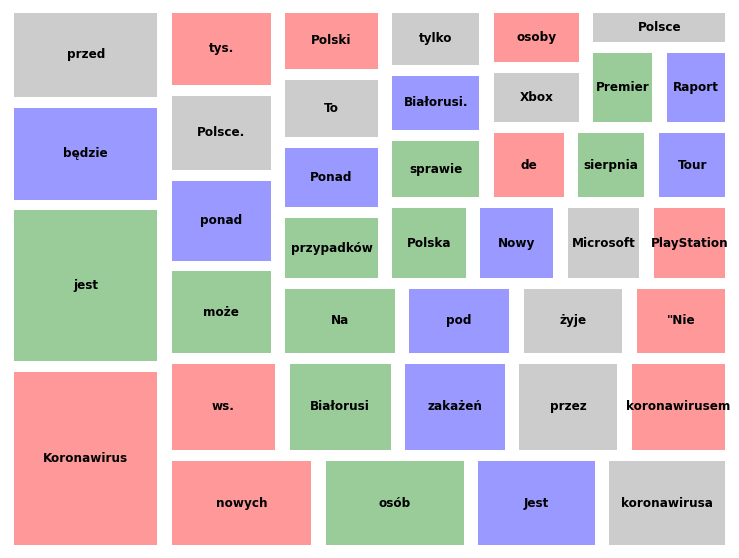

In [ ]:
# libraries
import matplotlib.pyplot as plt
!pip install squarify
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd

# plot it
fig = plt.figure(figsize=(13,10))
test = squarify.plot(sizes=values, label=labels, alpha=.4, text_kwargs={'fontsize':12, 'weight':'bold'}, color=["red","green","blue", "grey"], pad=True)
plt.axis('off')


In [ ]:
print(values)

(890, 676, 424, 399, 387, 347, 347, 332, 314, 297, 291, 257, 254, 244, 243, 231, 224, 217, 214, 214, 211, 209, 205, 202, 201, 195, 194, 190, 188, 179, 179, 178, 177, 176, 174, 172, 167, 158, 158, 155)


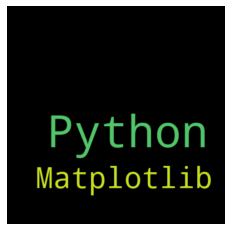

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Python Python Python Matplotlib")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()